Heart Disease Dataset
https://www.kaggle.com/ronitf/heart-disease-uci
Creators of the Dataset: 
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D. 
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D. 
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D. 
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Donor: David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

In [1]:
# Reading the data
import pandas as pd
data = pd.read_csv("heart.csv")
# Well, it looks like the heart disease guys are grouped together and the fit guys are grouped together
# I need to see if train_test_split separates them

In [2]:
data.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
5     57    1   0       140   192    0        1      148      0      0.4   
6     56    0   1       140   294    0        0      153      0      1.3   
7     44    1   1       120   263    0        1      173      0      0.0   
8     52    1   2       172   199    1        1      162      0      0.5   
9     57    1   2       150   168    0        1      174      0      1.6   
10    54    1   0       140   239    0        1      160      0      1.2   
11    48    0   2       130   275    0        1      139

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
data.describe()
# No missing values - heart attack averted

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data.dtypes.value_counts()
# 13 integer features (includes the target)
# 1 float feature called oldpeak

int64      13
float64     1
dtype: int64

In [6]:
# Lets see the data
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
# Checking for missing values
data.isnull().sum() # Glad to see all zeroes

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
data.isnull().any() # No null values in any columns

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [10]:
allColumns = data.columns.values.tolist()
numColumns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
catColumns = [col for col in allColumns if col not in numColumns]
# In notebook, print both

In [11]:
# Checking for duplicate values
data[data.duplicated() == True]
# patient no 164 is duplicate
# Removing the duplicate record

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [13]:
data.drop_duplicates(inplace=True)
# Now checking
data[data.duplicated() == True]
# Now it returned none

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


# Exploratory Data Analysis

# Univariate analysis

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
# Target variable
# sns.countplot(data['target']) # This will also give the same graph, 
plt.style.use('ggplot')
sns.set_style('whitegrid')

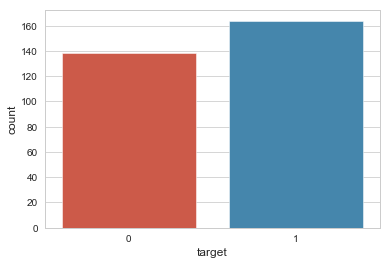

In [15]:
# Target Variable
sns.countplot(x=data['target']) # but value_counts() will just count the value first - easy on memory

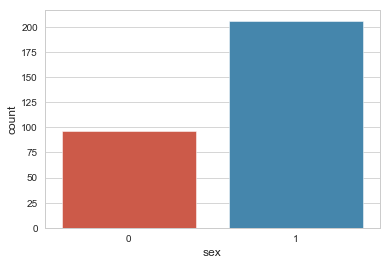

In [16]:
# Sex
sns.countplot(data['sex'])

    ageBin
60      72
55      57
65      46
45      45
50      31
70      27
40      11
35       6
75       4
80       2
30       1


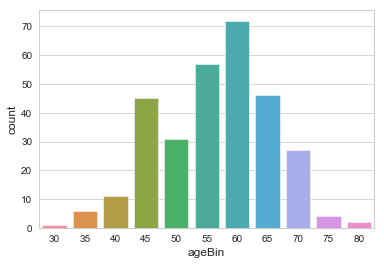

In [17]:
# Age distribution
pd.DataFrame(data['age'].describe())
data['ageBin'] = pd.cut(x=data.age, bins=[0, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80], labels=[30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80])
'''
(0, 30] -- 1
(30, 35] -- 6
etc
'''
# Here, a new col is created
# If the age is <30, the col value for that record will be 30
# Personal Note: This will be a good function to use in monte carlo simulation
print(pd.DataFrame(data['ageBin'].value_counts()))
# Visualizing the above result in sns
sns.countplot(data['ageBin'])

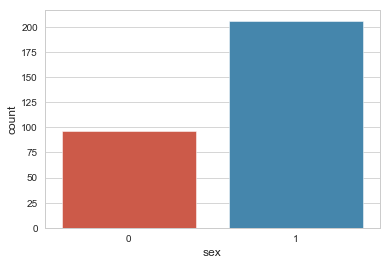

In [18]:
# Sex distribution
pd.DataFrame(data['sex'].value_counts())
sns.countplot(data['sex'])

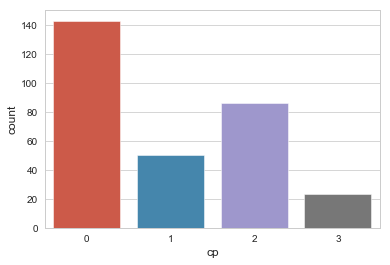

In [19]:
# CP: Chest Pain type
pd.DataFrame(data['cp'].value_counts())
sns.countplot(data['cp'])
# I'm no doctor, but I guess it is nominal 4 valued categorical from the dataset documentation
# Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic
# In dataset, value starts from 0

range(125, 601, 50)


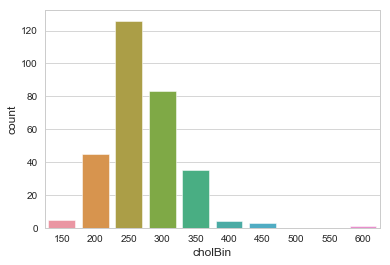

In [20]:
# Cholestrol
pd.DataFrame(data['chol'].describe())
# Min is 126(Vegan for sure), max is 564(Holy Crap, I would like his diet)
# Lets sort these into bins
'''
(125, 150],
(150, 200],
...,
(550, 600]
'''
print(range(125, 601, 50))
mylist = list(range(150, 601, 50))
mylist.append(125)
mylist.sort()
mylist
data['cholBin'] = pd.cut(data.chol, bins=mylist, labels=list(range(150, 601, 50)))
pd.DataFrame(data['cholBin'].value_counts())
sns.countplot(data['cholBin'])

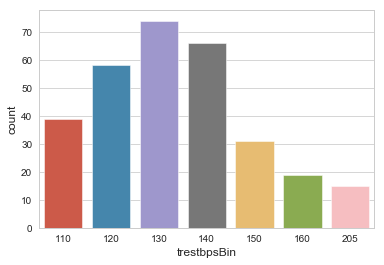

In [21]:
# trestbps
# It is the resting blood pressure on admission at the hospital
# Numerical Value
data['trestbps'].describe() # This also works
# data.trestbps.describe() # This also works
# Min is 84 mm Hg, max is 200 mm Hg (The nurse who took his BP might be hot)
data['trestbpsBin'] = pd.cut(data.trestbps, bins=[93, 110, 120, 130, 140, 150, 160, 205], labels=[110, 120, 130, 140, 150, 160, 205])
data['trestbpsBin'].value_counts()
sns.countplot(data.trestbpsBin) # This also works
# sns.countplot(data['trestbpsBin'])

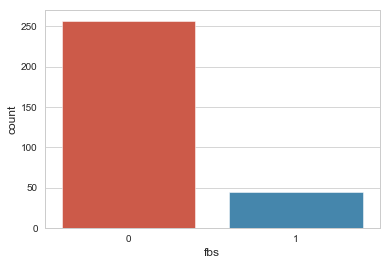

In [22]:
# FBS
# Will be 1 if the fasting blood sugar is higher than the normal 120 mg/dl
data.fbs.unique()
# Two values = 1 and 0
sns.countplot(data.fbs)

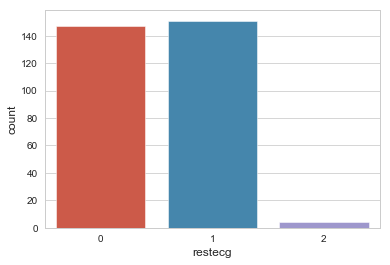

In [23]:
# restecg
# Resting ECG results
data.restecg.unique()
# We get three values
# restecg: resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 20
# What I understood is 0 is normal, 1 is pretty bad and 2 is fucked up
# Therefore ordinal categorical
sns.countplot(data.restecg)

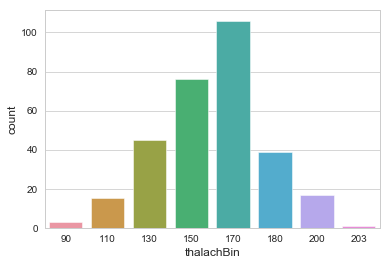

In [24]:
# thalach
# Maximum heart rate achieved
data.thalach.unique()
# Integer numerical value
data.thalach.describe()
# min is 71
# max is 202
data['thalachBin'] = pd.cut(data.thalach, bins=[70, 90, 110, 130, 150, 170, 180, 200, 203], labels=[90, 110, 130, 150, 170, 180, 200, 203])
data.thalachBin.value_counts()
sns.countplot(data.thalachBin) # Is that a normal distributioin I see?

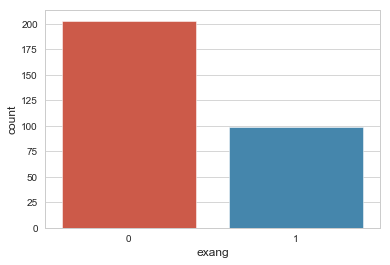

In [25]:
# exang
# Exercise included?
# 1 is Yes, 0 is No
sns.countplot(data.exang)

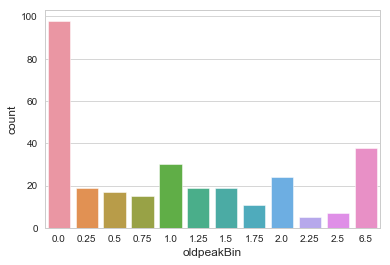

In [26]:
# oldpeak
# ST depression induced due to exercise relative to rest
# ST means something Thoracic - some chest measure as I remember from data's doc and paper
data.oldpeak.describe()
# min is 0, max is 6.2
# float value
# sns.countplot(data.oldpeak) # isnt working well, need to discretize this
data['oldpeakBin'] = pd.cut(data.oldpeak, 
    bins=[-0.1, 0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 6.5],
    labels=[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 6.5])
sns.countplot(data.oldpeakBin)

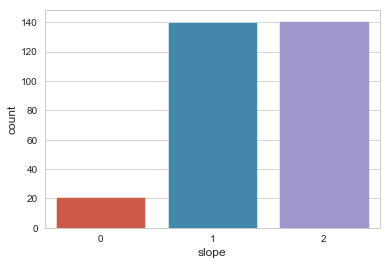

In [27]:
# Slope
# the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping
# I'm guessing ordinal categorical
sns.countplot(data.slope)

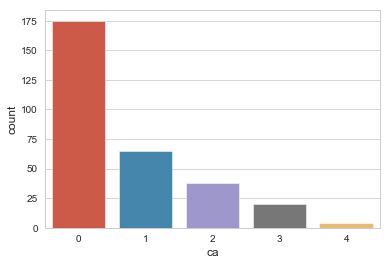

In [28]:
# ca
# number of major vessels (0-3) colored by flourosopy
data.ca.unique()
sns.countplot(data.ca)

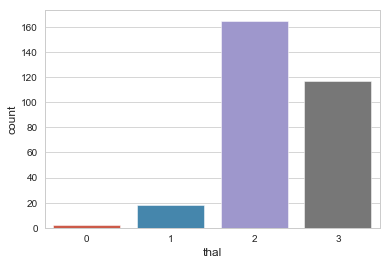

In [29]:
# thal
# thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
data.thal.unique()
sns.countplot(data.thal)
# I cant find this in the data's doc, I dont know whether to take it as ordinal or nominal

In [ ]:
# And thus the univariate analysis is complete

# Multivariate Analysis

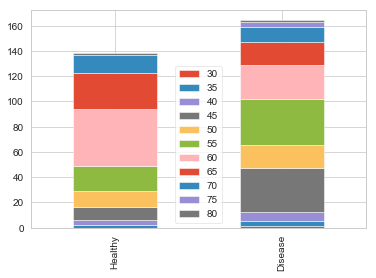

In [30]:
# Age with respect to heart disease
target1 = data[data['target']==1]['ageBin'].value_counts()
target0 = data[data['target']==0]['ageBin'].value_counts()
temp = pd.DataFrame([target0, target1])
temp.index = ['Healthy', 'Disease']
temp.plot(kind='bar', stacked=True)

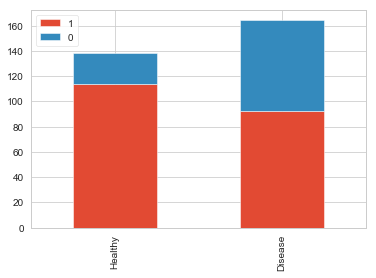

In [31]:
# Sex with respect to heart disease
target1 = data[data['target']==1]['sex'].value_counts()
target0 = data[data['target']==0]['sex'].value_counts()
tempDf = pd.DataFrame([target0, target1])
tempDf.index = ['Healthy', 'Disease']
tempDf.plot(kind='bar', stacked=True)

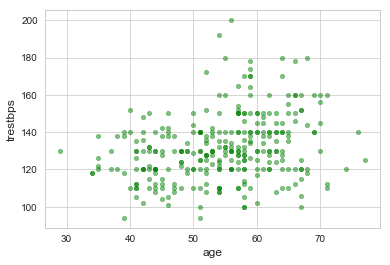

In [32]:
# Relationship between age and trestbps
data.plot(kind='scatter', x='age', y='trestbps', color='green', alpha=0.5)
# More people will have higher blood pressure as they age

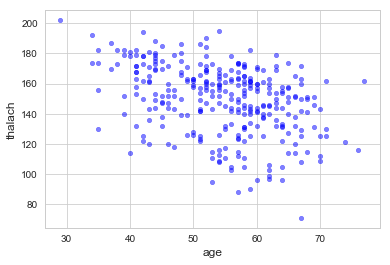

In [33]:
# Relationship between age and maximum heartrate acheived
data.plot(kind='scatter', x='age', y='thalach', color='blue', alpha=0.5)
# As you age, the maximum heart rate you can achieve will gradually reduce

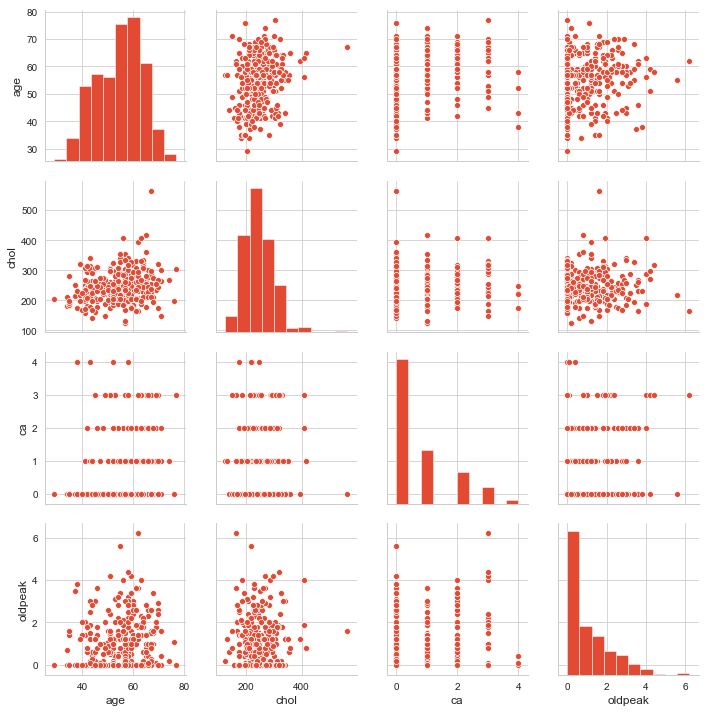

In [34]:
# Relationships between age, cholestrol, ca and oldpeak
sns.pairplot(data.loc[:, ['age', 'chol', 'ca', 'oldpeak']])

In [35]:
# Correlation Matrix
dataCorr = data.corr()['target'][:-1] # Last row is the target
# Now take the most correlated features
goldFeaturesList = dataCorr[abs(dataCorr) > 0.1].sort_values()
# So the strongly correlated features with the target are
goldFeaturesList

exang      -0.435601
oldpeak    -0.429146
ca         -0.408992
thal       -0.343101
sex        -0.283609
age        -0.221476
trestbps   -0.146269
restecg     0.134874
slope       0.343940
thalach     0.419955
cp          0.432080
Name: target, dtype: float64

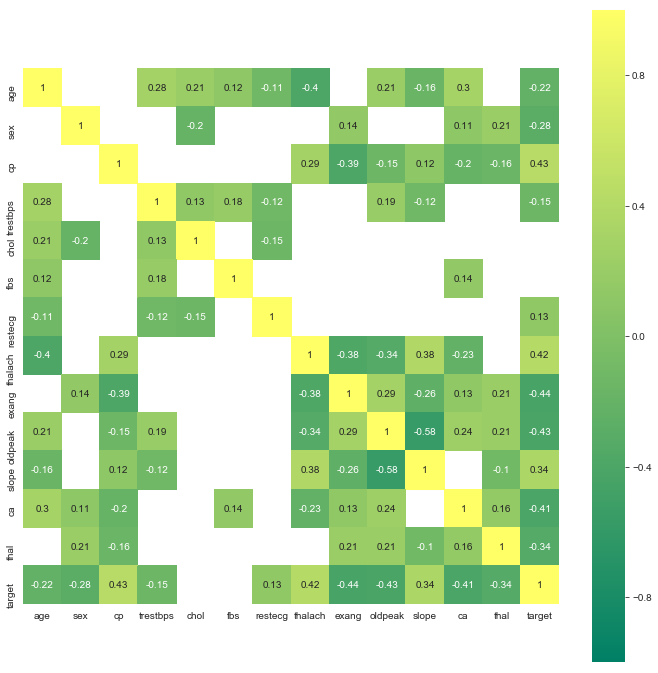

In [36]:
# Drawing the correlation matrix
corr = data.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(data=corr[abs(corr) > 0.1], vmin=-1, vmax=1, cmap='summer', annot=True, cbar=True, square=True)

# Modeling 

In [37]:
# Again importing data
data = pd.read_csv('heart.csv')
y = data['target']
X = data.drop(['target'], axis=1)
# Train-Test Split
from sklearn.model_selection import train_test_split
Xtrain, Xtest, yTrain, yTest = train_test_split(X, y, test_size=0.25, random_state=0)
# Yep, train test split will randomize (obviously, what was I thinking)

In [48]:
# Evaluating the results
# First, lets make a function to evaluate the results of prediction
from sklearn.metrics import confusion_matrix
# Precision = tp/(tp+fp) ie out of all predicted positive, how many actually have heartDisease
from sklearn.metrics import precision_score
# Recall = tp/(tp+fn) ie out of all heart disease patients, how many are detected by our MLalgo
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc

def evaluateModel(yTrue, yPredicted, modelName):
    print("=====================================================")
    print("Result of prediction for the model - ", modelName)
    confMatrix = confusion_matrix(yTrue, yPredicted)
    print("Confusion Matrix")
    print(confMatrix)
    precision = round(precision_score(yTrue, yPredicted), 4)
    print("Precision is ", precision)
    print("Out of all predicted as Heart Patients, {} percent actually have Heart Disease".format(precision*100))
    recall = round(recall_score(yTrue, yPredicted), 4)
    print("Recall is ", recall)
    print("Out of all actual heart patients, {0} is able to detect {1} percent of them".format(modelName, recall*100))
    print("Drawing the ROC")
    fpr, tpr, thresholds = roc_curve(yPredicted, yTrue)
    roc_auc = round(auc(fpr, tpr), 3) # I only need three decimal places
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=1, label="{0}, area={1}".format(modelName, roc_auc))
    plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--') # Apparently this is line between (0,0) and (1,1)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("Flase Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic for {}".format(modelName))
    plt.legend(loc="lower right")
    plt.show()
    print("=====================================================")

# Modeling    

# Traditional Models

Result of prediction for the model -  Logistic Regression
Confusion Matrix
[[24  9]
 [ 4 39]]
Precision is  0.8125
Out of all predicted as Heart Patients, 81.25 percent actually have Heart Disease
Recall is  0.907
Out of all actual heart patients, Logistic Regression is able to detect 90.7 percent of them
Drawing the ROC


/home/themadscientist/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


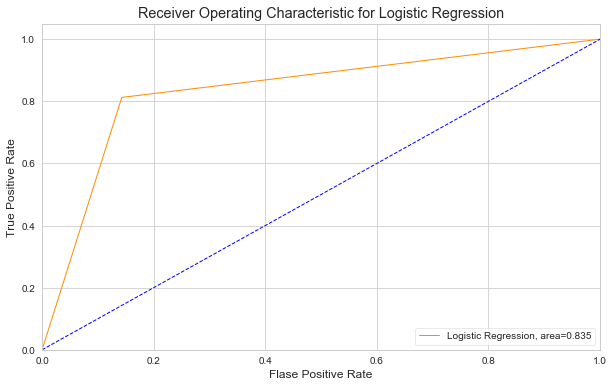

In [39]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logisticRegression = LogisticRegression(random_state=0)
logisticRegression.fit(Xtrain, yTrain)
yPredLogReg = logisticRegression.predict(Xtest)
# Evaluating Logistic Regression
evaluateModel(yTest, yPredLogReg, "Logistic Regression")

Result of prediction for the model -  Naive Bayes
Confusion Matrix
[[24  9]
 [ 4 39]]
Precision is  0.8125
Out of all predicted as Heart Patients, 81.25 percent actually have Heart Disease
Recall is  0.907
Out of all actual heart patients, Naive Bayes is able to detect 90.7 percent of them
Drawing the ROC


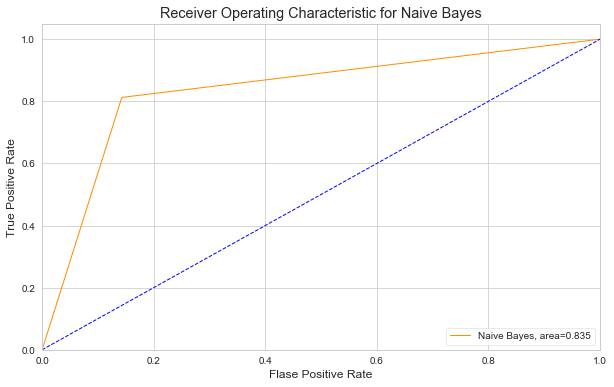

In [40]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
naiveBayes = GaussianNB(priors=None)
naiveBayes.fit(Xtrain, yTrain)
yPredNaiveBayes = naiveBayes.predict(Xtest)
# Evaluating Naive Bayes
evaluateModel(yTest, yPredNaiveBayes, "Naive Bayes")

Result of prediction for the model -  Decision Tree
Confusion Matrix
[[24  9]
 [ 7 36]]
Precision is  0.8
Out of all predicted as Heart Patients, 80.0 percent actually have Heart Disease
Recall is  0.8372
Out of all actual heart patients, Decision Tree is able to detect 83.72 percent of them
Drawing the ROC


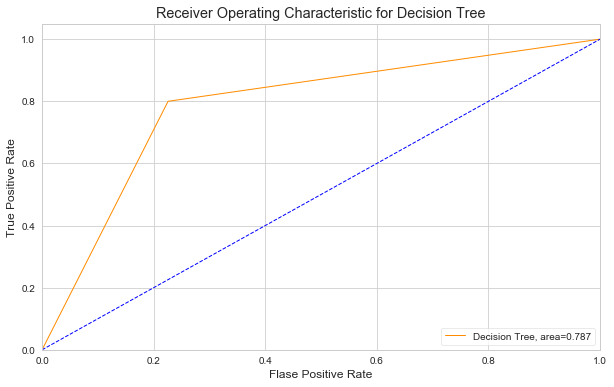

In [41]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
decTree = DecisionTreeClassifier(criterion='entropy', random_state=0)
decTree.fit(Xtrain, yTrain)
yPredDecTree = decTree.predict(Xtest)
# Evaluating Decision Tree
evaluateModel(yTest, yPredDecTree, "Decision Tree")

# Using Ensemble Methods

# Now let us use Bagging Methods

Result of prediction for the model -  Random Forest
Confusion Matrix
[[24  9]
 [ 4 39]]
Precision is  0.8125
Out of all predicted as Heart Patients, 81.25 percent actually have Heart Disease
Recall is  0.907
Out of all actual heart patients, Random Forest is able to detect 90.7 percent of them
Drawing the ROC


/home/themadscientist/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


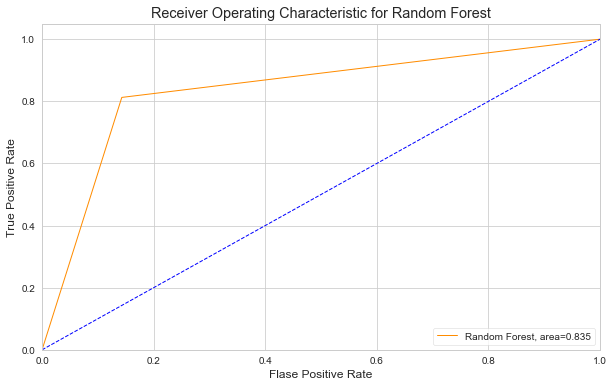

In [42]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
randForest = RandomForestClassifier(criterion='entropy', random_state=0)
randForest.fit(Xtrain, yTrain)
yPredRandForest = randForest.predict(Xtest)
# Evaluating Random Forest
evaluateModel(yTest, yPredRandForest, "Random Forest")

Result of prediction for the model -  Extra Trees
Confusion Matrix
[[25  8]
 [ 9 34]]
Precision is  0.8095
Out of all predicted as Heart Patients, 80.95 percent actually have Heart Disease
Recall is  0.7907
Out of all actual heart patients, Extra Trees is able to detect 79.07 percent of them
Drawing the ROC


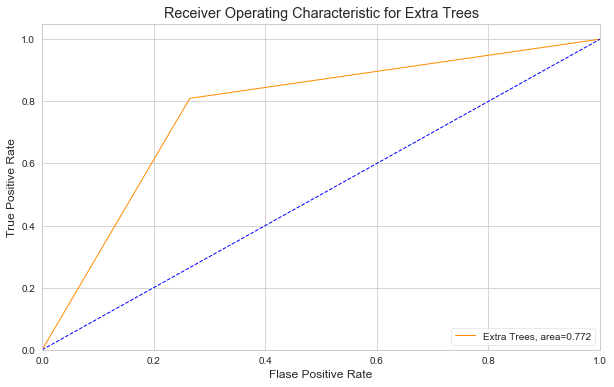

In [43]:
# Extra Trees Classifier
# ie Extremely Randomized Trees Classifier
# ET algorithm is quite similar to Random Forest - but splits are selected on random instead of using some criterions. 
from sklearn.ensemble import ExtraTreesClassifier
extraTrees = ExtraTreesClassifier(n_estimators=10, criterion='entropy', bootstrap=False, random_state=0)
# If bootstrap is false, whole dataset is used to build the tree, if true, samples are drawn with replacement
# 10 individual decision trees running based on entropy and information gain
extraTrees.fit(Xtrain, yTrain)
yPredExtraTrees = extraTrees.predict(Xtest)
# Evaluating Extra Trees
evaluateModel(yTest, yPredExtraTrees, "Extra Trees")

Result of prediction for the model -  Logreg Bagging
Confusion Matrix
[[25  8]
 [ 4 39]]
Precision is  0.8298
Out of all predicted as Heart Patients, 82.98 percent actually have Heart Disease
Recall is  0.907
Out of all actual heart patients, Logreg Bagging is able to detect 90.7 percent of them
Drawing the ROC


/home/themadscientist/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/themadscientist/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/themadscientist/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/themadscientist/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/themadscientist/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarn

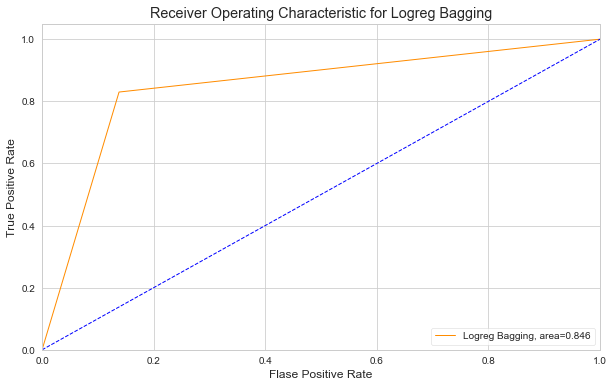

In [44]:
# Bagging using individual logistic regression models
from sklearn.ensemble import BaggingClassifier
# Make a Logistic Regression Classifier
logRegModelToBag = LogisticRegression(random_state=0)
logRegBagging = BaggingClassifier(base_estimator=logRegModelToBag, n_estimators=10, bootstrap=True, random_state=0)
logRegBagging.fit(Xtrain, yTrain)
yPredLogRegBag = logRegBagging.predict(Xtest)
# Evaluating bagging using individual logistic regression models
evaluateModel(yTest, yPredLogRegBag, "Logreg Bagging")

# Boosting Methods

Result of prediction for the model -  Gradient Boosting
Confusion Matrix
[[24  9]
 [ 6 37]]
Precision is  0.8043
Out of all predicted as Heart Patients, 80.43 percent actually have Heart Disease
Recall is  0.8605
Out of all actual heart patients, Gradient Boosting is able to detect 86.05000000000001 percent of them
Drawing the ROC


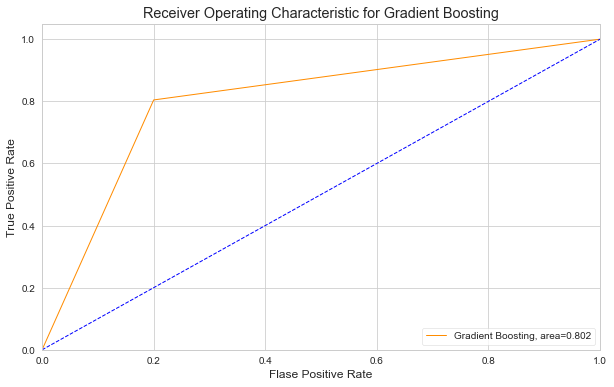

In [45]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gradBoost = GradientBoostingClassifier(random_state=0)
gradBoost.fit(Xtrain, yTrain)
yPredGradBoost = gradBoost.predict(Xtest)
# Evaluating Gradient Boosting Classifier
evaluateModel(yTest, yPredGradBoost , "Gradient Boosting")

Result of prediction for the model -  XG Boost
Confusion Matrix
[[25  8]
 [ 5 38]]
Precision is  0.8261
Out of all predicted as Heart Patients, 82.61 percent actually have Heart Disease
Recall is  0.8837
Out of all actual heart patients, XG Boost is able to detect 88.37 percent of them
Drawing the ROC


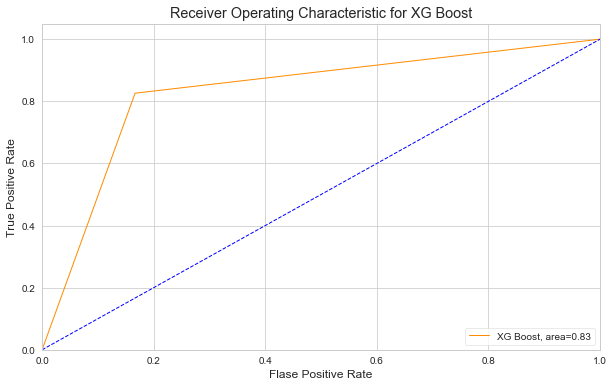

In [46]:
# Extreme Gradient Boosting
# Note: Need to install xgboost in conda
# conda install -c conda-forge xgboost
from xgboost import XGBClassifier
xgbClassifier = XGBClassifier(n_estimators=100, random_state=0)
xgbClassifier.fit(Xtrain, yTrain)
yPredXgb = xgbClassifier.predict(Xtest)
# Evaluating xg Boost
evaluateModel(yTest, yPredXgb, "XG Boost")

Result of prediction for the model -  AdaBoost on Decision Tree
Confusion Matrix
[[26  7]
 [ 9 34]]
Precision is  0.8293
Out of all predicted as Heart Patients, 82.93 percent actually have Heart Disease
Recall is  0.7907
Out of all actual heart patients, AdaBoost on Decision Tree is able to detect 79.07 percent of them
Drawing the ROC


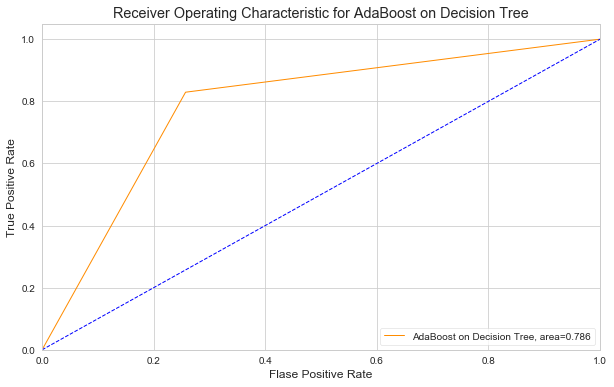

In [47]:
# AdaBoost on Decision Tree Similar to above
from sklearn.ensemble import AdaBoostClassifier
decTreeAdaBoostModel = DecisionTreeClassifier(criterion='entropy', random_state=0)
adaBoost = AdaBoostClassifier(base_estimator=decTreeAdaBoostModel, random_state=0)
adaBoost.fit(Xtrain, yTrain)
yPredAdaBoost = adaBoost.predict(Xtest)
# Evaluating Adaboost
evaluateModel(yTest, yPredAdaBoost, "AdaBoost on Decision Tree")

# Results

The AUC for the different models are summarized below:

Traditional Models
1. Logistic Regression - 0.835
2. Naive Bayes -0.835
3. Decision Tree - 0.787

Ensemble Bagging Models
1. Random Forest - 0.835
2. Extra Trees - 0.772
3. Custom Bagging using Logistic Regression - 0.856

Ensemble Boosting Models
1. Gradient Boosting - 0.802
2. Extreme Gradient Boosting - 0.83
3. AdaBoost - 0.786

What we can see is: 
1. When a single decision tree gave an AUC of 0.787, a Random Forest trained on similar individual decision trees gave a better score of 0.835. 
2. A single Logistic Regression model gave an AUC of 0.835, a Bagging classifier made using 10 such Logistic Regression models gave a slightly higher score of 0.856
3. Extra Trees Classifier gave the least score
4. Highest AUC was from the custom made Boosting Classifier that uses individual Logistic Regression models.

# Future Work

To conclusively prove that the change in accuracy is due to the superiority of the classifier and not the randomness of the data by using statistical testing.